# Example GUI

Load packages

In [1]:
from brighteyes_ffs.fcs_gui.read_ffs import read_g_from_ffs, read_ffs_file
import matplotlib.pyplot as plt
import numpy as np

FFS file name

In [2]:
ffs_file = r'D:\ffs\HEK.ffs'

## Read file and plot correlations

'read' can be either
* 'active' to read the correlations and fits that were on-screen at the moment the file was saved, or
* a list [im, ffs, corr, fit] with four entries describing from which image, FFSfile, correlation analysis, and fit analysis you want to read. E.g. The .ffs file contains 2 cell images. For the first image, 3 FFS measurements were done at different locations. For the third location, you did spot-variation analysis and pair-correlation analysis. You fitted the spot-variation analysis first with Free diffusion 1 component and then with Free diffusion 2 components. Now, you want to read that second fit. Hence, you want to read image 0, FFS measurement 2, correlation analysis 0, fit analysis 1: read=[0, 2, 0, 1].

In [3]:
G, tau, Gfit, taufit = read_g_from_ffs(ffs_file, read='active')

findfont: Font family ['DejaVu Sans Display'] not found. Falling back to DejaVu Sans.


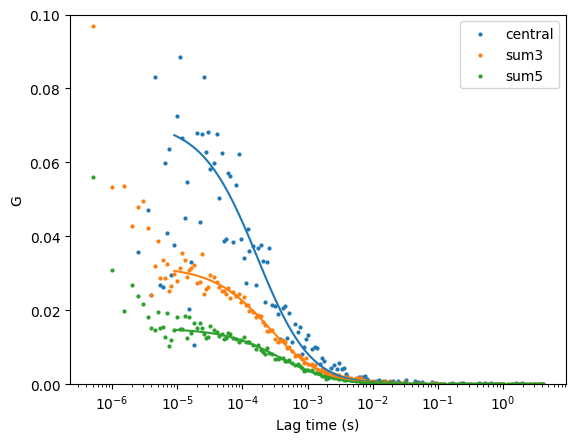

In [4]:
labels=['central', 'sum3', 'sum5']
plt.figure()
for i in range(3):
    plt.scatter(tau, G[:,i],s=4, label=labels[i])
    plt.plot(taufit, Gfit[:,i])
plt.legend()
plt.ylim([0,0.1])
plt.xlabel('Lag time (s)')
plt.ylabel('G')
plt.xscale('log')

In [5]:
G, tau, Gfit, taufit = read_g_from_ffs(ffs_file, read=[0,2,1,0]) # read from image 0, ffs file 2, correlation analysis 1, fit 0

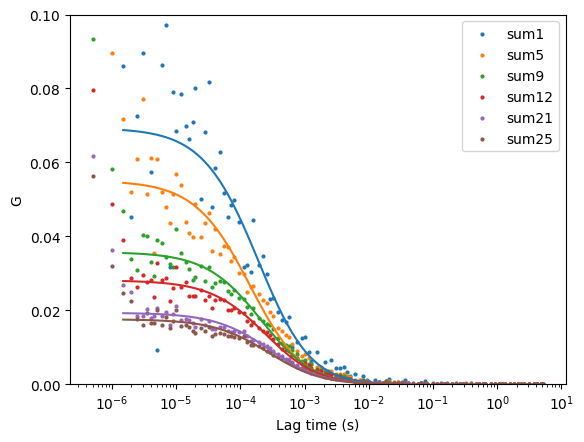

In [6]:
labels=[1, 5, 9, 12, 21, 25]
plt.figure()
for i in range(6):
    plt.scatter(tau, G[:,i],s=4, label='sum'+str(labels[i]))
    plt.plot(taufit, Gfit[:,i])
plt.legend()
plt.ylim([0,0.1])
plt.xlabel('Lag time (s)')
plt.ylabel('G')
plt.xscale('log')

In [7]:
fit = read_ffs_file(ffs_file, read=[0,2,1,0], returnObj='fit')
print('Fitted N values')
for i in range(len(fit.fit_all_curves)):
    fitvalues = fit.fit_all_curves[i].startvalues
    print(fitvalues[0])

print()
print('Fitted diffusion times')
for i in range(len(fit.fit_all_curves)):
    fitvalues = fit.fit_all_curves[i].startvalues
    print(str(fitvalues[1]) + ' ms')

Fitted N values
14.430981692497726
18.16968499227053
27.992777096136145
35.63910901250995
51.83961534345058
56.99727873094348

Fitted diffusion times
0.19590345575428622 ms
0.14718163183540303 ms
0.21978616186810998 ms
0.2546304554789899 ms
0.29677159343494636 ms
0.2882888740568556 ms
